# Jupyter for working with cars dataset

In [27]:
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Describe and analyze data

Data was prepared beforehand. That means, that original `.csv` file differs from that, what we use here.

In [2]:
data = pd.read_csv("car_price_prediction.csv")

In [3]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
0,13328,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,False
1,16621,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,False
2,8467,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,False
3,3607,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,False
4,11726,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  bool   
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  int64  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  int64  
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Turbo             19237 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object

In [5]:
data.describe()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,2.307990,1.532236e+06,4.582991,3.925872
std,1.905813e+05,5.668673,0.877805,4.840387e+07,1.199933,0.403399
min,1.000000e+00,1939.000000,0.000000,0.000000e+00,1.000000,2.000000
25%,5.331000e+03,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,2012.000000,2.000000,1.260000e+05,4.000000,4.000000
75%,2.207500e+04,2015.000000,2.500000,1.888880e+05,4.000000,4.000000
max,2.630750e+07,2020.000000,20.000000,2.147484e+09,16.000000,5.000000


In [6]:
data.shape

(19237, 16)

Finding unique values in each column

In [7]:
for col in data.columns:
    print(col)
    print(data[f'{col}'].unique())
    print('*'*75)

Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Manufacturer
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
***************************************************************************
Model
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
***************************************************************************
Prod. year
[2010 

## Inspection for outliers

We have to check if data contains some values, that are laying too far from normal and thus can influence our future model

Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

![](doc/z-score.png)

Data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. This shows in detail about outlier treatment in Python.

![](doc/iqr.png)

Steps
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute $IQR=Q3-Q1$
- compute $lower\_bound = (Q1–1.5\cdot IQR)$, $upper\_bound = (Q3+1.5\cdot IQR)$
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

To utilize this, function `detect_outliers` was created. It returns indices, that are too much of a difference with all values.

We mainly have to deal with `Price` and `Mileage`, as they are only "numeric" values

In [8]:
def detect_outliers(dataframe, columns, threshold=1.5):
    outlier_indices = []

    for c in columns:
        Q1 = np.percentile(dataframe[c], 25)
        Q3 = np.percentile(dataframe[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * threshold
        outlier_list_col = dataframe[(dataframe[c] < Q1 - outlier_step)
                                     | (dataframe[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    return outlier_indices

columns_to_detect = ["Mileage", "Price"]

outliers = detect_outliers(data, columns_to_detect)
print(outliers)

[8, 29, 39, 65, 90, 144, 169, 191, 252, 281, 351, 369, 400, 428, 429, 475, 493, 508, 513, 517, 563, 598, 625, 640, 712, 731, 748, 824, 850, 868, 918, 943, 964, 966, 985, 1042, 1053, 1086, 1093, 1118, 1128, 1146, 1148, 1156, 1170, 1208, 1254, 1337, 1368, 1373, 1386, 1404, 1410, 1544, 1560, 1622, 1665, 1701, 1710, 1765, 1788, 1806, 1821, 1846, 1881, 1892, 1893, 1912, 1920, 1950, 2033, 2075, 2105, 2118, 2123, 2126, 2127, 2138, 2188, 2255, 2274, 2278, 2286, 2319, 2324, 2399, 2418, 2461, 2464, 2501, 2512, 2529, 2584, 2588, 2635, 2638, 2666, 2874, 2897, 2903, 2952, 2961, 2986, 3043, 3056, 3083, 3097, 3170, 3177, 3219, 3282, 3320, 3326, 3505, 3548, 3604, 3607, 3624, 3627, 3652, 3698, 3706, 3715, 3721, 3726, 3744, 3747, 3781, 3792, 3845, 3850, 3877, 3895, 3896, 3985, 3995, 4004, 4009, 4023, 4040, 4061, 4079, 4080, 4130, 4148, 4170, 4174, 4175, 4187, 4200, 4230, 4248, 4371, 4394, 4429, 4432, 4445, 4516, 4541, 4552, 4658, 4685, 4694, 4823, 4892, 4893, 4907, 4941, 4996, 5068, 5130, 5146, 5164, 52

Let's now check how values are placed in our array

In [9]:
def print_ranges(c, threshold=1.5):
    Q1 = np.percentile(data[c], 25)
    Q3 = np.percentile(data[c], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * threshold
    left = Q1 - outlier_step
    right = Q3 + outlier_step
    print(f"Ranges for {c}: {left} - {right}")
    
print_ranges("Mileage")
print_ranges("Price")
data.iloc[outliers[0]]

Ranges for Mileage: -107984.5 - 367011.5
Ranges for Price: -19785.0 - 47191.0


Price                     1098
Manufacturer            TOYOTA
Model                    Camry
Prod. year                2014
Category                 Sedan
Leather interior          True
Fuel type               Hybrid
Engine volume              2.5
Mileage                 398069
Cylinders                  4.0
Gear box type        Automatic
Drive wheels             Front
Doors                        4
Wheel               Left wheel
Color                    Black
Turbo                    False
Name: 8, dtype: object

As we can see, this line has too high `Mileage`, thus is an outlier. You will see in the next cells why data has to be cleaned

In [14]:
cleaned_data = data.drop(data.loc[outliers].index,axis=0)

This is how cleaned data is plotted

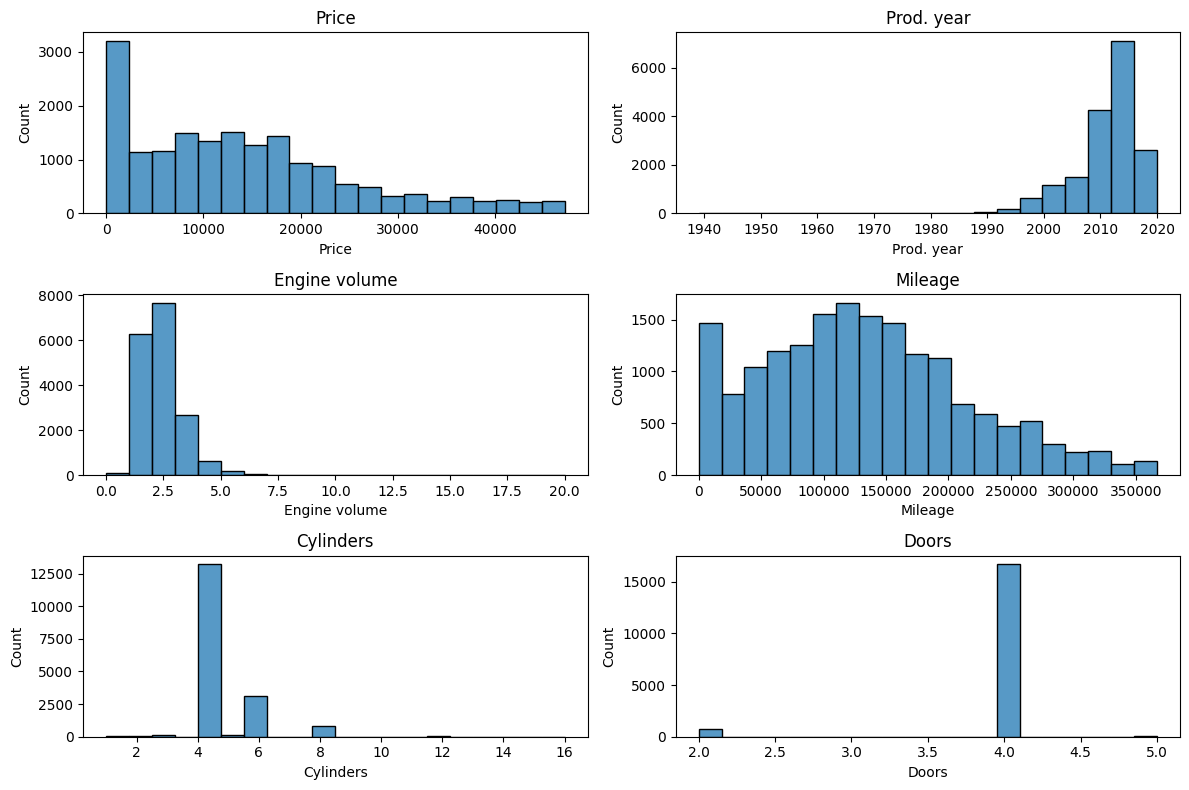

In [32]:
numerical_columns = ['Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors']

plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 2, numerical_columns.index(feature) + 1)
    sns.histplot(data=cleaned_data[feature], bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()



This is what original data looks like (with a lot of outliers)

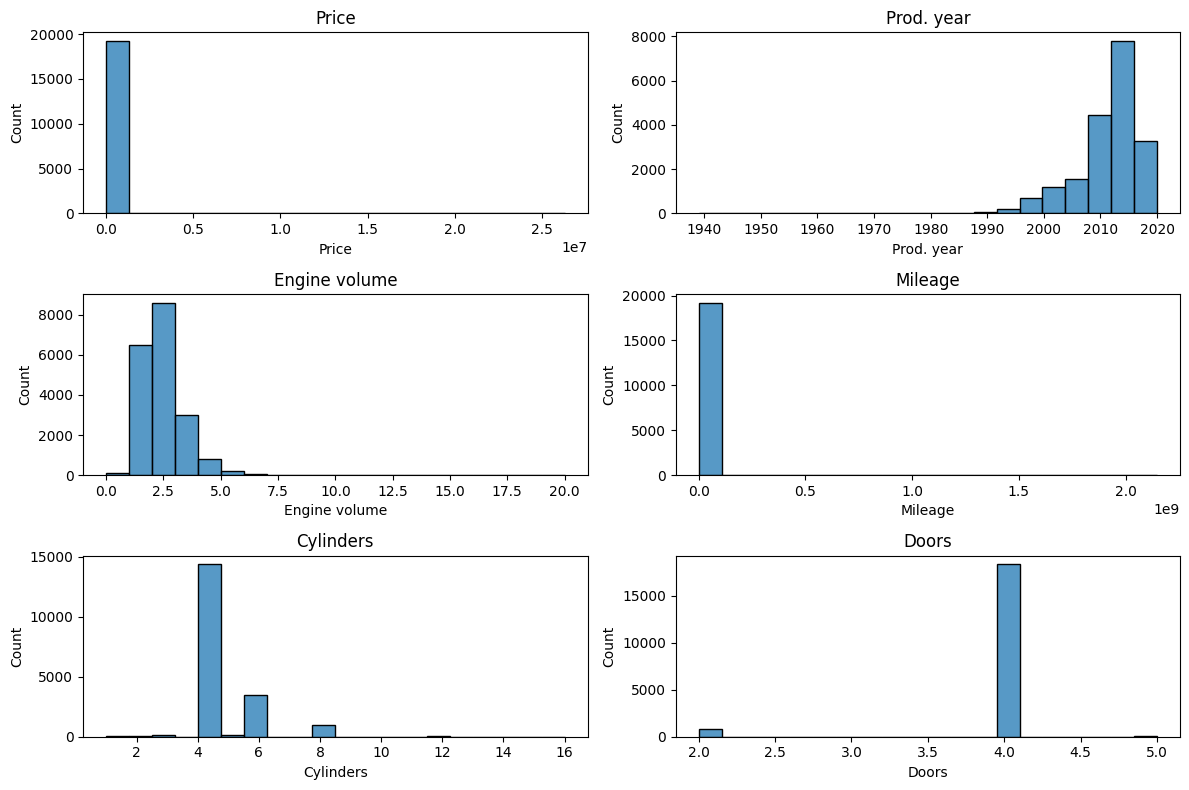

In [33]:
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 2, numerical_columns.index(feature) + 1)
    sns.histplot(data=data[feature], bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()

Let's plot cathegorical columns

In [34]:
cleaned_data.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Turbo'],
      dtype='object')

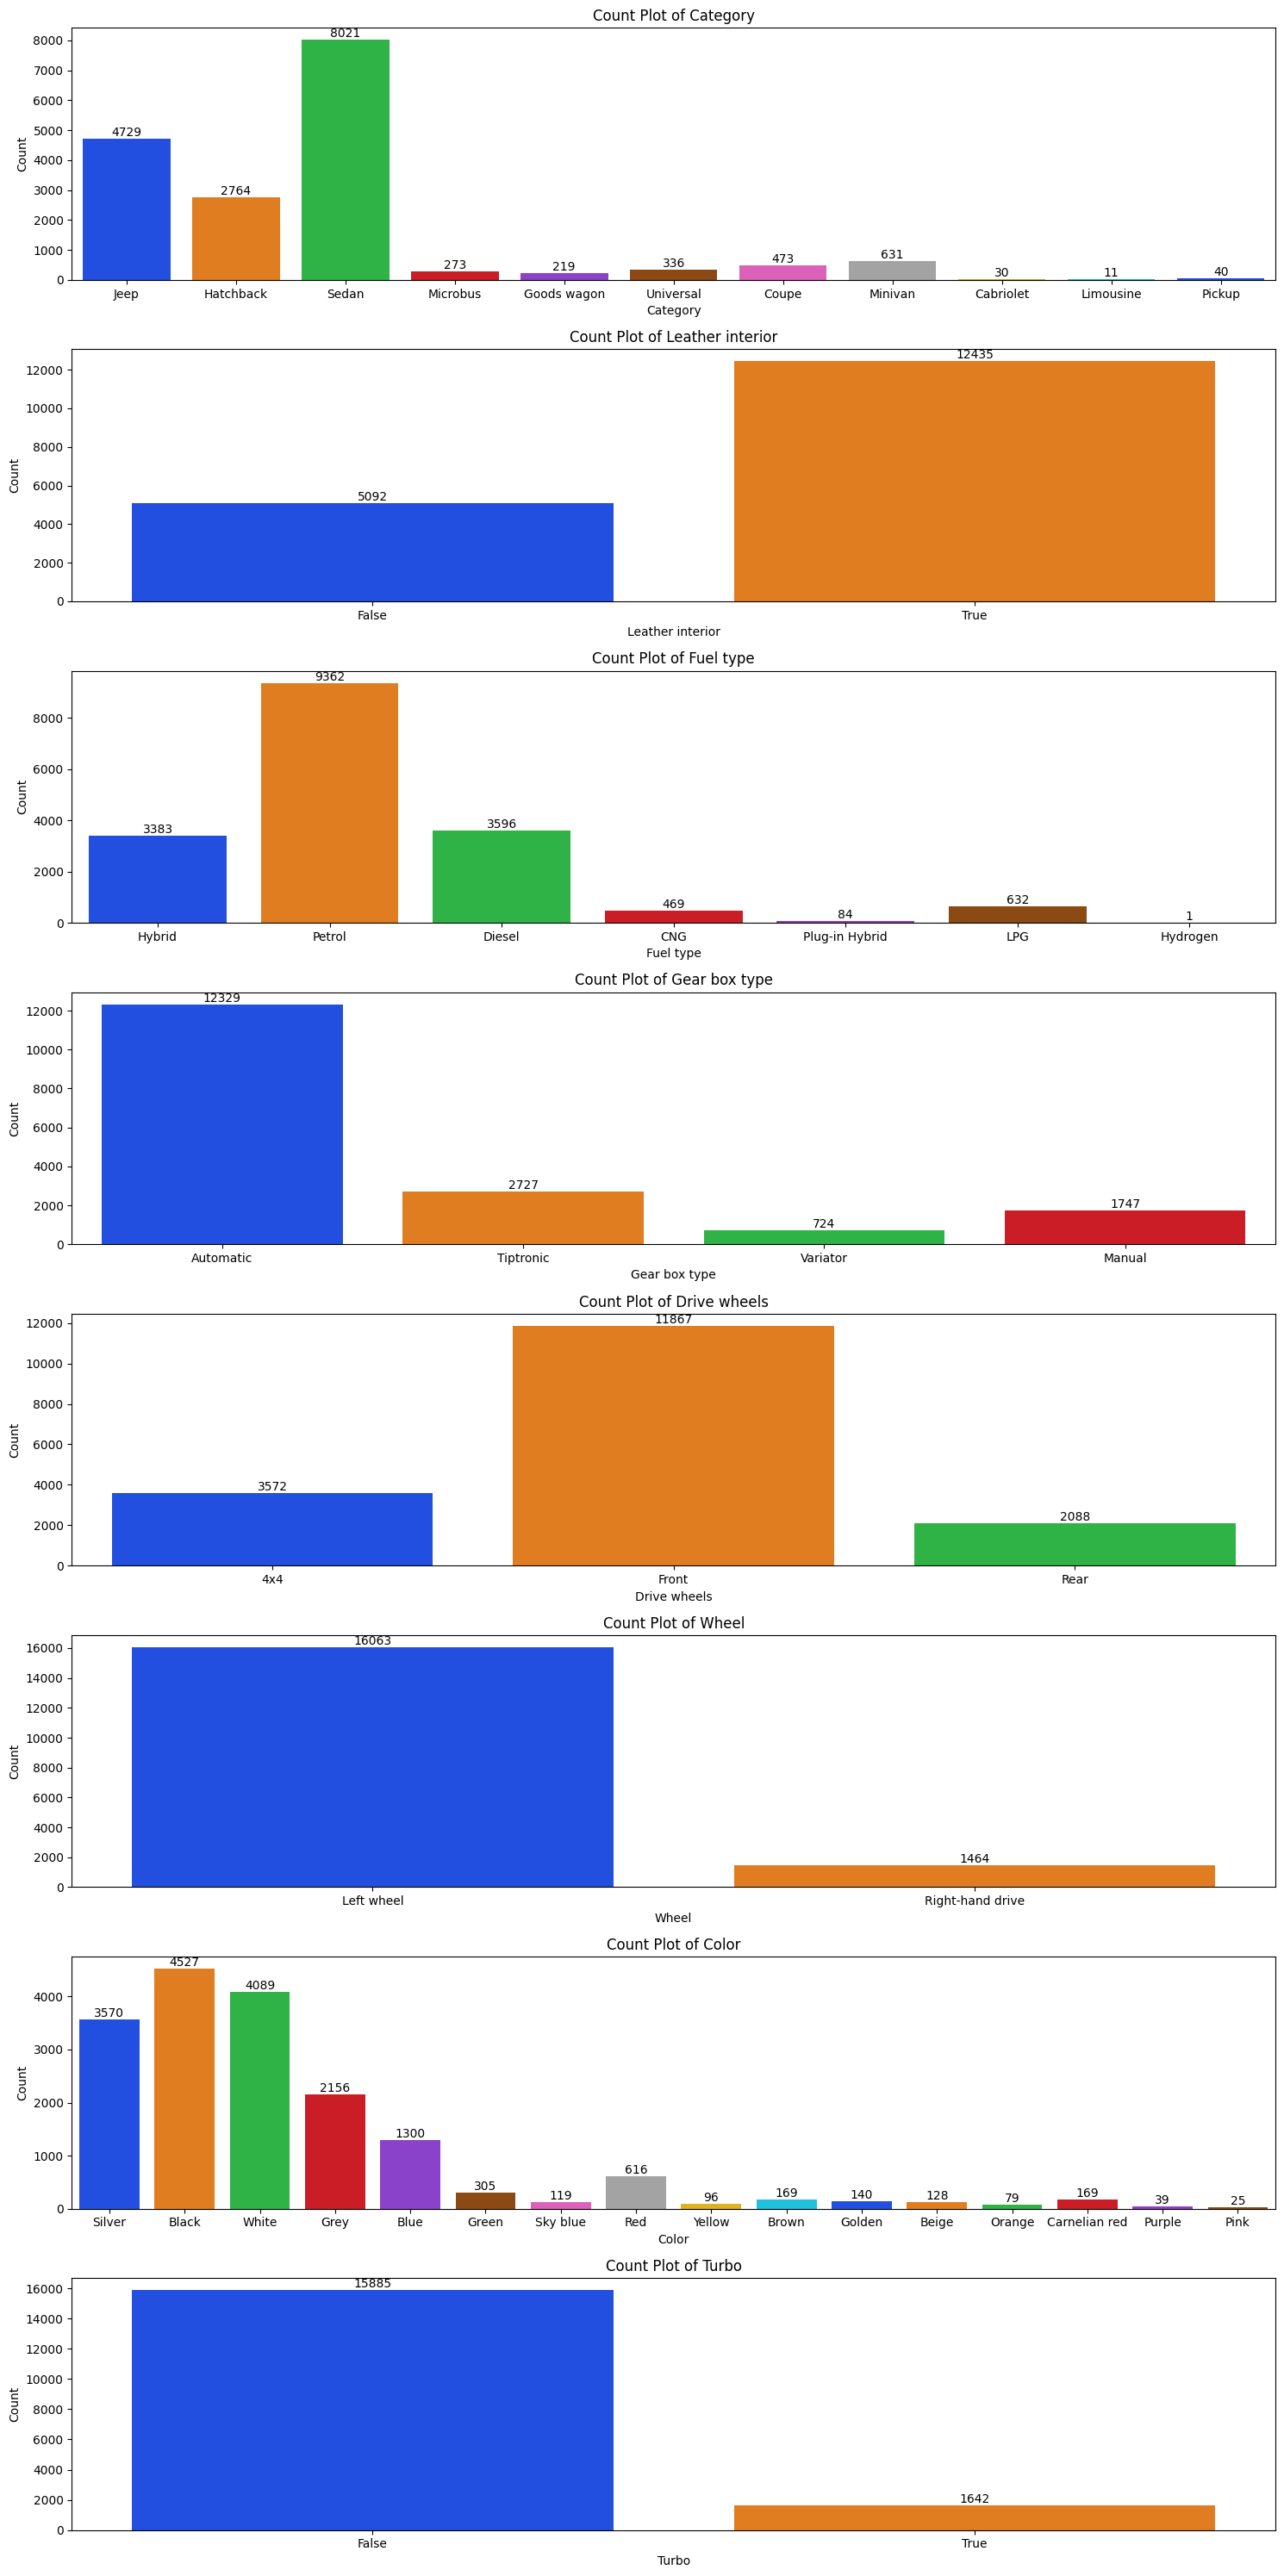

In [55]:
categorical_columns = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(15, 30))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=cleaned_data[column], data=cleaned_data, legend=False, ax=axes[i], palette="bright", hue=cleaned_data[column])
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [ ]:
# dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# label_encoder.classes_

In [ ]:
data

In [ ]:
def detect_outliers(df,features,thold):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [ ]:
# label_encoder = LabelEncoder()
# # data['Engine volume_new'] = label_encoder.fit_transform(data['Engine volume'])
# # dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# train_frame = pd.DataFrame()

# transform_dict = {"Manufacturer" : {},
#                   "Category" : {},
#                   "Leather interior" : {},
#                   "Fuel type" : {},
#                   "Engine volume" : {},
#                   "Gear box type" : {},
#                   "Drive wheels" : {},
#                   "Wheel" : {},
#                   "Color" : {}}



# for key in transform_dict:
#     label_encoder = LabelEncoder()
#     train_frame[key] = label_encoder.fit_transform(data[key])
#     transform_dict[key] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    

# for column in data.columns:
#     if column not in train_frame.columns and column != "Model":
#         train_frame[column] = data[column]

In [ ]:
train_frame

In [ ]:
X = train_frame.drop(['Price', 'Manufacturer'], axis=1)  # X contains all columns except 'Price'
y = train_frame['Price']  # y contains only the 'Price' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)